In [9]:
import os

import numpy as np
import cv2 as cv
# Keras modules
from keras.models import load_model

# matplotlib modules
import matplotlib.pyplot as plt

from helpers.loss import IOU_calc, IOU_calc_loss
from helpers.utils import getImage



In [10]:
ABS_PATH = ''
DATA_DIR_PATH = '/home/mert/ceng407-408/sample-dataset/'
MODEL_PATH = "/home/mert/ceng407-408/ceng-407-408-License-Plate-Recognition-Using-Deep-Learning/src/model/unet-model-trained.h5"

IMG_WIDTH,IMG_HEIGHT, IMG_CHNLS = 256, 256, 3


In [11]:
datalist = [os.path.join(DATA_DIR_PATH, f) for f in os.listdir(DATA_DIR_PATH)]

datalist

['/home/mert/ceng407-408/sample-dataset/22AL800_ARKA_1548328178178_010322011201_2019-01-24-14-09-38-178_539-570-739-645.jpg',
 '/home/mert/ceng407-408/sample-dataset/34KGL35_ON_1548356000986_010321022101_2019-01-24-21-53-23-131_845-679-1045-754.jpg',
 '/home/mert/ceng407-408/sample-dataset/MNB694_ON_1548317780130_010322011101_2019-01-24-11-16-21-634_624-534-824-609.jpg',
 '/home/mert/ceng407-408/sample-dataset/16AOZ24_ON_1548317540429_010321022101_2019-01-24-11-12-22-282_950-618-1150-693.jpg',
 '/home/mert/ceng407-408/sample-dataset/XKN8558_ON_1548345435926_010321021101_2019-01-24-18-57-25-304_750-666-950-741.jpg',
 '/home/mert/ceng407-408/sample-dataset/34ZJ1364_ON_1548319125015_010321022101_2019-01-24-11-38-46-806_993-697-1193-772.jpg',
 '/home/mert/ceng407-408/sample-dataset/EBM7845_ON_1548349862710_010321021101_2019-01-24-20-11-04-725_797-698-997-773.jpg',
 '/home/mert/ceng407-408/sample-dataset/34TP3058_ON_1548323491644_010321022101_2019-01-24-12-51-34-650_746-694-946-769.jpg',
 '

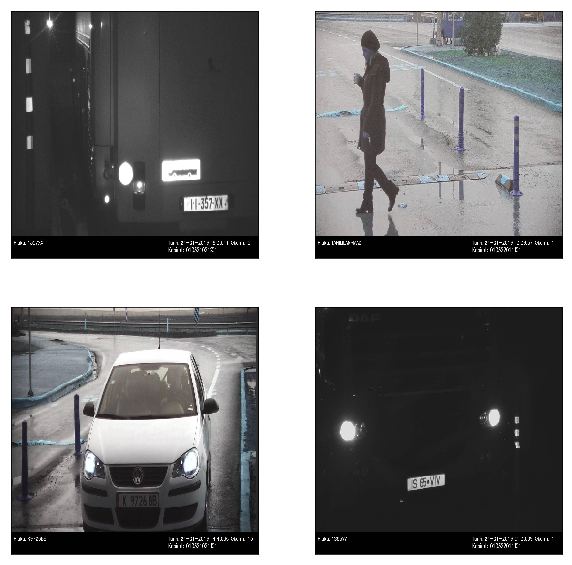

In [12]:
# plot a random sample
plt.figure(figsize=(10,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    idx = np.random.randint(low=0, high=len(datalist))
    #
    # read the img
    img = getImage(datalist[idx], (IMG_WIDTH, IMG_HEIGHT))
    #
    plt.imshow(img)

### Our Model

In [13]:
additions = {
    "IOU_calc": IOU_calc,
    "IOU_calc_loss": IOU_calc_loss
}
model = load_model(MODEL_PATH, custom_objects=additions)

## Test the model

### Test on static images

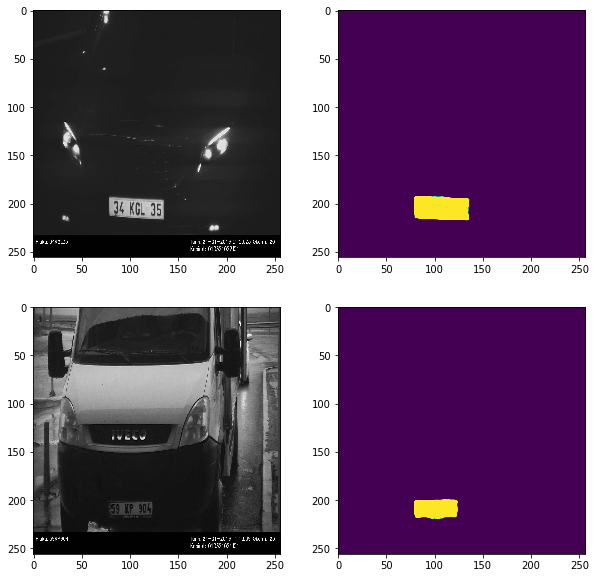

In [26]:
# predict a random sample
plt.figure(figsize=(10,10))
for i in range(1, 5, 2):
    aorig = plt.subplot(2, 2, i)
    apred = plt.subplot(2, 2, i+1)
    plt.grid(False)
    idx = np.random.randint(low=0, high=len(datalist))
    #
    # read the img
    img = getImage(datalist[idx], (IMG_WIDTH, IMG_HEIGHT))
    
    modelInput = img.reshape((img.shape[0], img.shape[1], 3))
    pred = model.predict(np.array([modelInput]))
    #
    #axarr.imshow(img)
    pred = pred.reshape((IMG_WIDTH, IMG_HEIGHT))
    aorig.imshow(img)
    apred.imshow(pred)#to have binary output cmap=plt.cm.binary
    

###  Test the model on video

In [8]:
import sys
import cv2
from PIL import Image


video = cv2.VideoCapture(0) # write path of video here

filename = len(os.listdir(directory))
count = 0

while True:
    _, frame = video.read()
    image = Image.fromarray(frame, 'RGB')
    image = cv2.resize(image, (config.IMG_WIDTH, config.IMG_HEIGHT))
    image = np.expand_dims(image, axis=0)

    pred = model.predict(image)
    pred = pred.reshape((256,256,1))
    pred = pred.astype(np.uint8)
    pred = cv2.resize(pred, (512,512))

    cv2.imshow("Capturing", frame)
    key=cv2.waitKey(1)
    if key == ord('q'):
            break
            
video.release()
cv2.destroyAllWindows()

NameError: name 'directory' is not defined